In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for labeling
from sklearn import preprocessing
#for roc and auc curve
from sklearn.metrics import roc_curve, auc
#libraries for decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image   #to view the image of the tree
from sklearn.tree import export_graphviz
import pydotplus
# for clustring
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
# for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression


In [4]:
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number_pregnant,768.0,3.845052,3.369578,0.0,1.000000,3.000000,6.000000,17.0
Glucose_concentration,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
Blood_pressure,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
Triceps,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
Pedigree,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Age,768.0,33.240885,11.760232,21.0,24.000000,29.000000,41.000000,81.0
Class,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


In [7]:
# define features
x = dataset.iloc[:,0:8]

# Define categorical outcomes
y = dataset.iloc[:,8]

In [9]:
x.shape

(768, 8)

In [10]:
y.shape

(768,)

In [11]:
# standardise feature space to have mean 0 variance 1
x_std = (x-np.mean(x,axis=0))/np.std(x,axis=0)

In [12]:
x_std.shape

(768, 8)

In [13]:
# step 1 Find covariance matrix
cov_matrix = np.cov(x_std,rowvar=False)

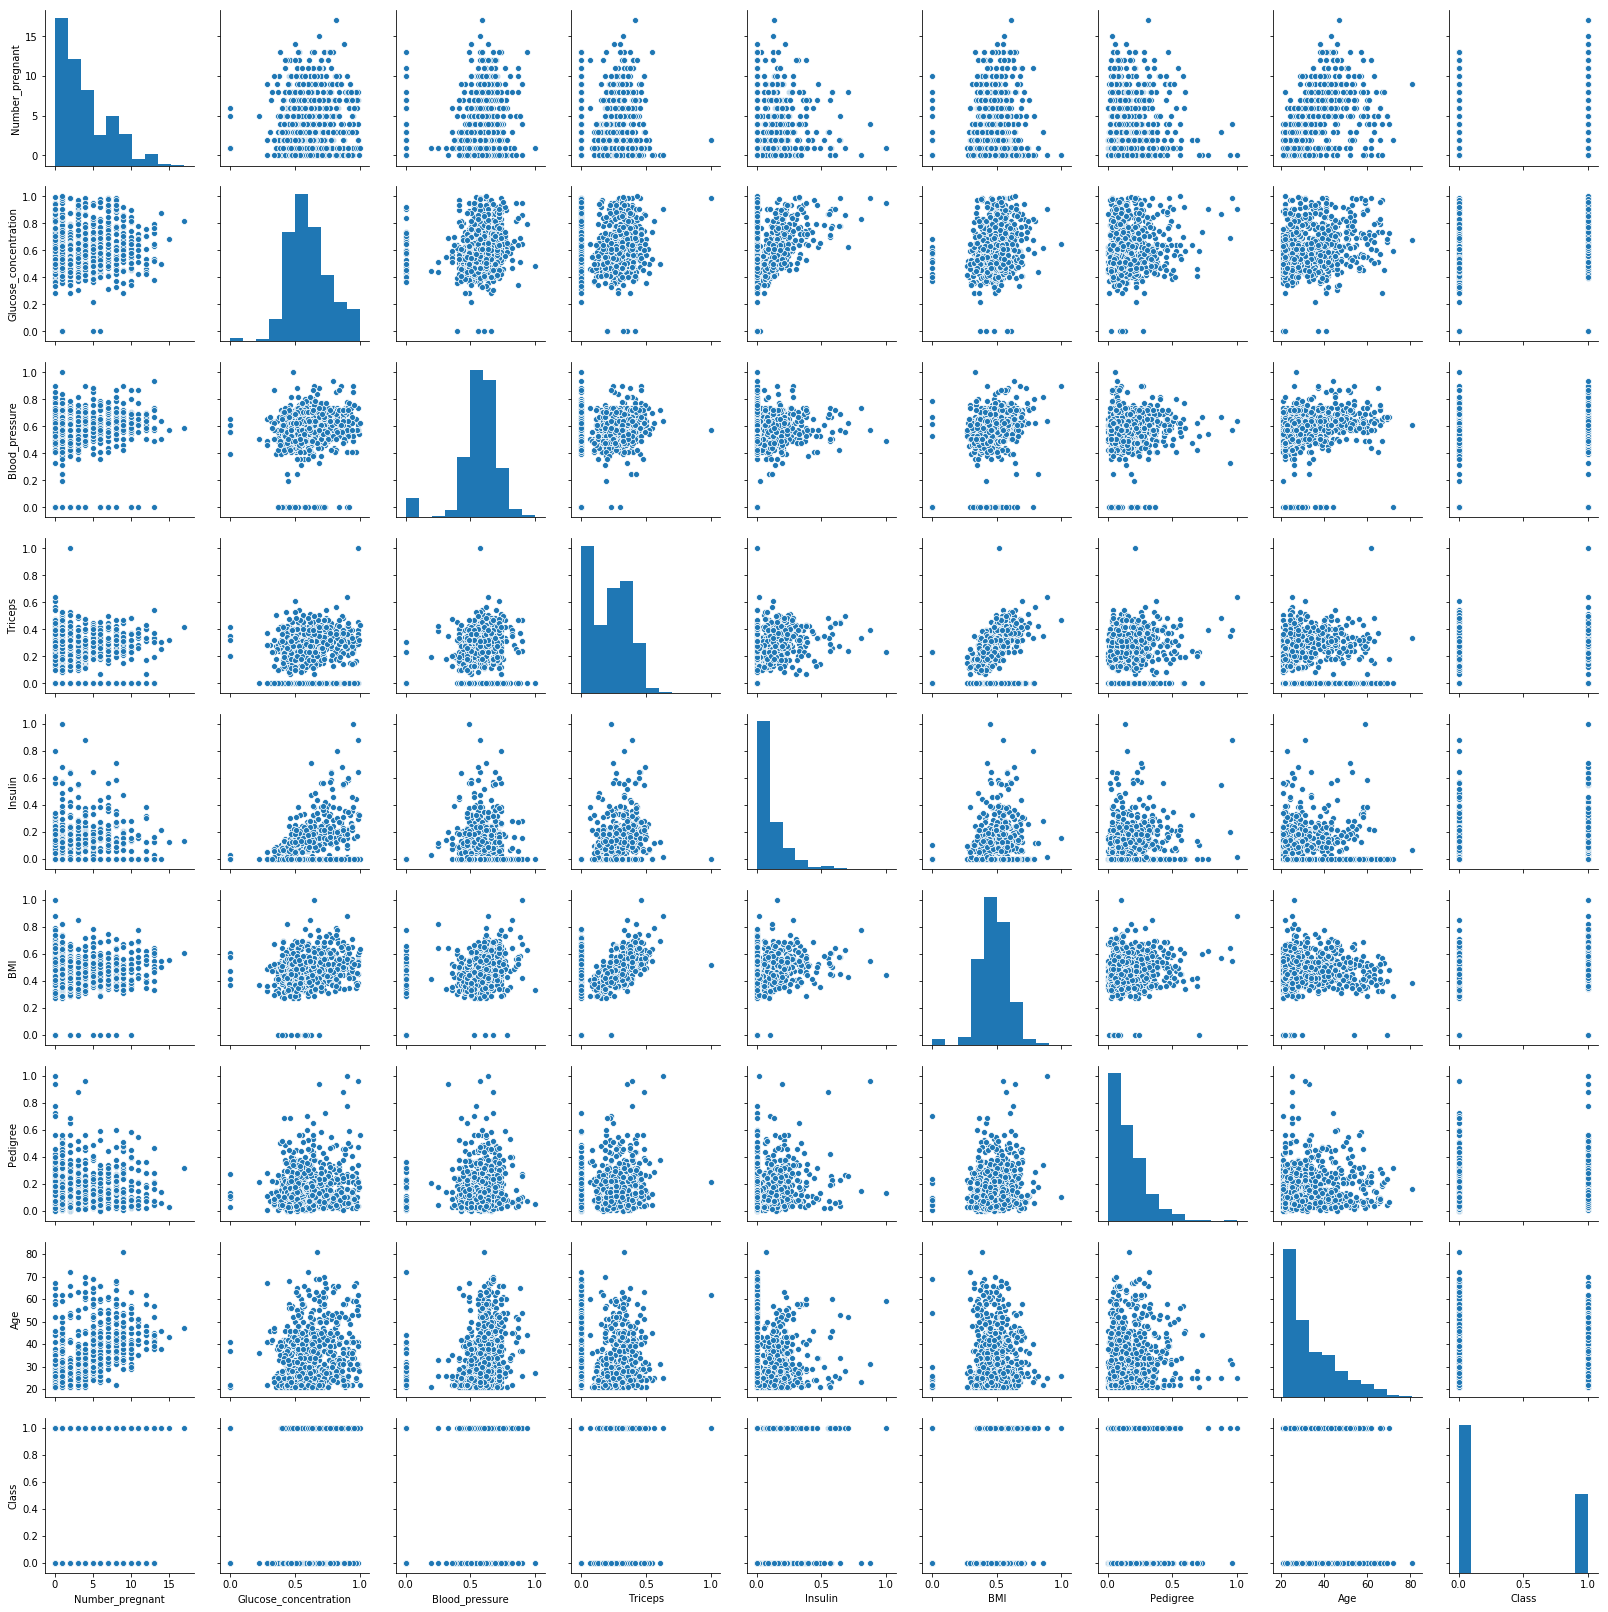

In [14]:
sns.pairplot(dataset)

In [15]:
# step 2 Obtain Eigen Vectors
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)

In [18]:
# eigrn values is a 8*1 vector
print('\n Eigen values of cov(x): \n', str(eigenvalues))


 Eigen values of cov(x): 
 [2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


In [20]:
# step 3 sort eigen values in descending order
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]

eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print(eigvalues_sort)

[2.097110557994527, 1.7334672594471294, 1.0309722810083828, 0.8766705419094801, 0.7633383156496747, 0.683518385844728, 0.42036352804956845, 0.4049893778148997]
